In [1]:
# Importing Libraries

import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df=df.iloc[:,1:]

In [4]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
df.tail()

,cgpa,iq,placement
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1
99,6.2,113.0,1


In [6]:
df.columns

Index(['cgpa', 'iq', 'placement'], dtype='object')

# Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
df.shape

(100, 3)

# EDA

In [9]:
import matplotlib.pyplot as plt

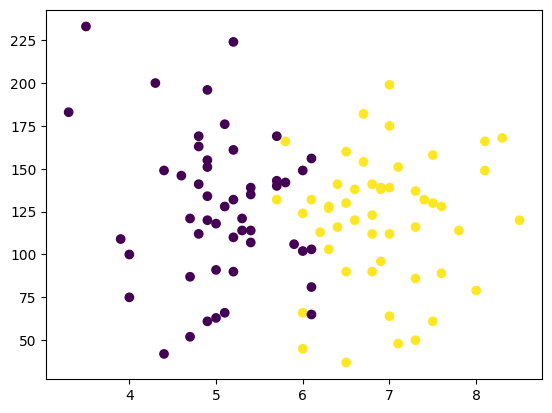

In [13]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])
plt.show()

# Using Logistic Regression model

In [15]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Split and Scale the values

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_train

,cgpa,iq
90,7.3,86.0
75,4.8,169.0
46,5.3,114.0
2,5.3,121.0
78,6.1,81.0
...,...,...
16,5.2,224.0
93,6.8,112.0
88,4.4,149.0
32,7.0,139.0


In [23]:
y_train

90    1
75    0
46    0
2     0
78    0
     ..
16    0
93    1
88    0
32    1
71    1
Name: placement, Length: 80, dtype: int64

In [25]:
X_test

,cgpa,iq
96,4.4,42.0
63,6.3,128.0
67,5.0,118.0
47,5.2,161.0
99,6.2,113.0
14,6.1,103.0
66,6.9,96.0
0,6.8,123.0
35,6.8,90.0
86,5.1,128.0


In [26]:
y_test

96    0
63    1
67    0
47    0
99    1
14    0
66    1
0     1
35    1
86    0
94    0
20    1
89    0
3     1
80    0
25    0
98    1
52    1
72    1
39    0
Name: placement, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)

In [30]:
X_train

array([[ 1.09134958, -0.954213  ],
       [-1.04019257,  1.09361322],
       [-0.61388414, -0.26338006],
       [-0.61388414, -0.09067182],
       [ 0.06820935, -1.07757602],
       [ 1.26187295,  0.82221456],
       [ 0.92082621, -1.89177199],
       [ 0.06820935,  0.77286935],
       [ 1.77344307,  0.60016112],
       [-0.2728374 ,  0.37810767],
       [ 1.09134958, -1.84242678],
       [ 0.32399441,  0.40278028],
       [ 1.51765801, -0.26338006],
       [-1.466501  ,  1.85846397],
       [-0.18757571,  1.0195954 ],
       [-0.78440751,  1.26632145],
       [-0.78440751, -1.4476651 ],
       [ 0.57977946,  0.72352414],
       [ 0.57977946,  1.41435708],
       [-0.52862245, -0.43608829],
       [-0.01705234, -0.01665401],
       [ 0.75030284,  0.32876246],
       [-0.95493088,  0.23007204],
       [-0.95493088,  0.74819675],
       [-0.52862245,  0.25474465],
       [ 0.06820935, -1.4723377 ],
       [ 1.26187295, -1.57102812],
       [ 0.83556452, -1.49701031],
       [-1.12545426,

In [31]:
X_test=scaler.transform(X_test)

In [32]:
X_test

array([[-1.38123931, -2.03980762],
       [ 0.23873272,  0.08203641],
       [-0.8696692 , -0.16468964],
       [-0.69914583,  0.89623238],
       [ 0.15347103, -0.28805266],
       [ 0.06820935, -0.53477871],
       [ 0.75030284, -0.70748695],
       [ 0.66504115, -0.04132661],
       [ 0.66504115, -0.85552258],
       [-0.78440751,  0.08203641],
       [-1.12545426, -1.79308157],
       [ 0.49451778, -0.11534443],
       [-0.95493088,  0.64950633],
       [ 1.17661127,  0.18072683],
       [-0.95493088,  1.75977355],
       [-0.8696692 , -0.83084997],
       [ 0.23873272, -0.53477871],
       [ 0.83556452,  1.24164885],
       [ 1.09134958, -0.21403485],
       [-1.21071594,  0.5261433 ]])

# Train a model (Using Logistic Regression)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf=LogisticRegression()

In [36]:
# model train
clf.fit(X_train,y_train)

LogisticRegression()

# Model Evaluation

In [37]:
clf.predict(X_test)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [38]:
y_test

96    0
63    1
67    0
47    0
99    1
14    0
66    1
0     1
35    1
86    0
94    0
20    1
89    0
3     1
80    0
25    0
98    1
52    1
72    1
39    0
Name: placement, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.95


In [48]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 667.8 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 525.1 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 658.3 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 958.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 2.3 MB/s eta 0:00:01
   -----------------------------

In [49]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

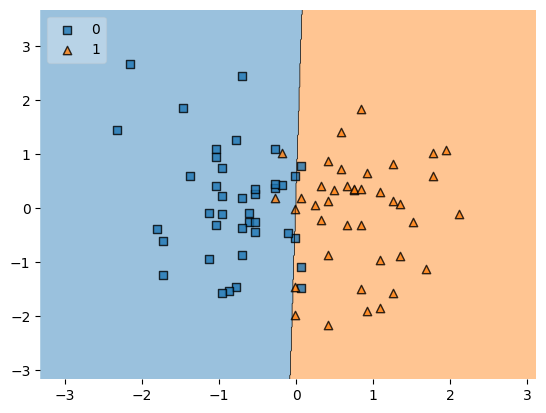

In [51]:
plot_decision_regions(X_train, y_train.values,clf=clf,legend=2)


In [52]:
# object---> convert to file
import pickle

In [53]:
pickle.dump(clf,open('model.pkl','wb'))